# Finding a particle's best path to a goal using gradient descent

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import time
# from vpython import*
# scene = canvas()
# sphere()

78
93


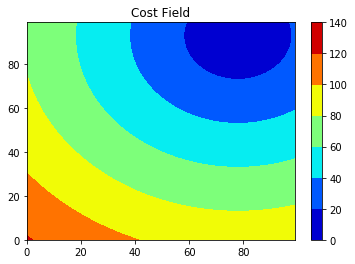

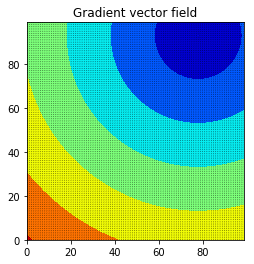

Initial Cost: 51.312766
Epoch 0, cost: 51.212766
Epoch 1, cost: 51.112766
Epoch 2, cost: 51.012766
Epoch 3, cost: 50.912766
Epoch 4, cost: 50.812766
Epoch 5, cost: 50.712766
Epoch 6, cost: 50.612766
Epoch 7, cost: 50.512766
Epoch 8, cost: 50.412766
Epoch 9, cost: 50.312766
Epoch 10, cost: 50.212766
Epoch 11, cost: 50.112766
Epoch 12, cost: 50.012766
Epoch 13, cost: 49.912766
Epoch 14, cost: 49.812766
Epoch 15, cost: 49.712766
Epoch 16, cost: 49.612766
Epoch 17, cost: 49.512766
Epoch 18, cost: 49.412766
Epoch 19, cost: 49.312766
Epoch 20, cost: 49.212766
Epoch 21, cost: 49.112766
Epoch 22, cost: 49.012766
Epoch 23, cost: 48.912766
Epoch 24, cost: 48.812766
Epoch 25, cost: 48.712766
Epoch 26, cost: 48.612766
Epoch 27, cost: 48.512766
Epoch 28, cost: 48.412766
Epoch 29, cost: 48.312766
Epoch 30, cost: 48.212766
Epoch 31, cost: 48.112766
Epoch 32, cost: 48.012766
Epoch 33, cost: 47.912766
Epoch 34, cost: 47.812766
Epoch 35, cost: 47.712766
Epoch 36, cost: 47.612766
Epoch 37, cost: 47.51276

(77.99303369473944, 92.9893017454927)

In [9]:
Grid = np.mgrid[0:100, 0:100]
X = Grid[0]
Y = Grid[1]
# Arb goal at 78, 93
print(X[78][0])
print(Y[0][93])
x_g = X[78][0]
y_g = Y[0][93]

C = computeCost(X, Y, x_g, y_g)
# print(computeCostField(0, 0, x_g, y_g))
# print(dx.shape)
# print(dy.shape)
# print(C[60][94])

plt.contourf(X, Y, C, cmap = 'jet')
plt.colorbar()
plt.title('Cost Field')
plt.show()


dx, dy = computeGradient(X,Y,x_g,y_g)
dx = -dx
dy = -dy
fig, ax = plt.subplots()
ax.contourf(X, Y, C, cmap = 'jet')
# fig.colorbar()
ax.quiver(X,Y,dx,dy)
ax.set(aspect=1, title='Gradient vector field')

# ax.xaxis.set_ticks([])
# ax.yaxis.set_ticks([])
# ax.set_aspect('equal')

plt.show()

gradDescent(50, 50, x_g, y_g)
# print(G[0,3,0])
# print(X)
# print(Y)

(1, 2)
---Matrix wise: 0.0016312599182128906 seconds ---


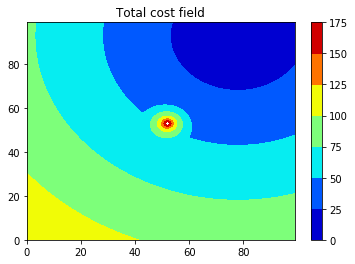

Opencountry


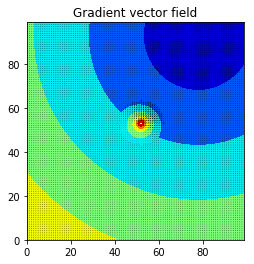

In [66]:
# obs = np.array([52,53,60,65,20,20])
obs = np.array([52,53])
obs = np.reshape(obs, (1,2))
print(obs.shape)

start_time = time.time()
C_obs = costWithObstables(X,Y,x_g,y_g,obs,10)
print("---Matrix wise: %s seconds ---" % (time.time() - start_time))

# start_time = time.time()
# C_obs_l = costFieldWithObstacles(X,Y,x_g,y_g,obs,10)
# print("---Nested loop: %s seconds ---" % (time.time() - start_time))
# print(C_obs.shape)
C_total = C+(50*C_obs)
# C_total_l = C+(50*C_obs_l)

plt.contourf(X, Y, C_total, cmap = 'jet')
plt.colorbar()
plt.title('Total cost field')
plt.show()


dx, dy = gradWithObst(X,Y,x_g,y_g,obs,10)
# dx_l, dy_l = gradFieldWithObstacles(X,Y,x_g,y_g,obs,10)
dx = -dx
dy = -dy
fig, ax = plt.subplots()
ax.contourf(X, Y, C_total, cmap = 'jet')
ax.quiver(X,Y,dx,dy)
ax.set(aspect=1, title='Gradient vector field')
plt.show()

In [8]:
def computeCost(X,Y, x_g, y_g):
   return np.sqrt(np.square(X-x_g) + np.square(Y-y_g))



In [18]:
def costFieldWithObstacles(X,Y, x_g, y_g, Obs, R):
    obsField = np.zeros([100, 100])
    for i in range(0,X.shape[0]):
        for j in range(0,Y.shape[0]):
            x = X[i][j]
            y = Y[i][j]
            x_o = Obs[0][0]
            y_o = Obs[0][1]
            d = euclDist(x,y, x_o,y_o)
            obsField[i][j] = 0 if d > R else obsField[i][j]+np.log(R/d)
    return obsField

In [52]:
def costWithObstables(X,Y, x_g, y_g, Obs, R):
    obsField = np.zeros([100,100])
    for i in range(0,Obs.shape[0]):
        x_o = Obs[i][0]
        y_o = Obs[i][1]
        d = euclDist(X,Y, x_o,y_o)
        openCountry = np.where(d>R)
        obsField += np.log(R/d)
        obsField[openCountry] = 0
    return obsField

In [15]:
def gradFieldWithObstacles(X,Y,x_g,y_g,Obs,R):
    dx = np.zeros([100,100])
    dy = np.zeros([100,100])
    for i in range(0,X.shape[0]):
        for j in range(0,Y.shape[0]):
            x = X[i][j]
            y = Y[i][j]
            x_o = Obs[0][0]
            y_o = Obs[0][1]
            d_g = euclDist(x,y,x_g,y_g) #euclidian distance to goal point
            d_o = euclDist(x,y,x_o,y_o) #enclidian distance to obstacle
            dx[i][j] = ((x-x_g)/d_g) - ((x-x_o)/d_o)
            dy[i][j] = ((y-y_g)/d_g) - ((y-y_o)/d_o)

    return dx, dy

In [7]:
def computeGradient(X, Y, x_g, y_g):
    C = computeCost(X, Y, x_g, y_g)
    dx = (X-x_g)/C
    dy = (Y-y_g)/C
    return dx, dy

In [64]:
def gradWithObst(X, Y, x_g, y_g, Obs, R):
    # C = computeCost(X, Y, x_g, y_g, Obs, R)
    # dx = (X-x_g)/C
    # dy = (Y-y_g)/C
    dx = np.zeros([100,100])
    dy = np.zeros([100,100])
    for i in range(0, Obs.shape[0]):
        x_o = Obs[i][0]
        y_o = Obs[i][1]
        d_g = euclDist(X,Y,x_g,y_g) #euclidian distance to goal point
        d_o = euclDist(X,Y,x_o,y_o) #euclidian distance to obstacle
        openCountry = np.where(d_o>R)
        dx += ((X-x_g)/d_g) - ((X-x_o)/d_o)
        dy += ((Y-y_g)/d_g) - ((Y-y_o)/d_o)
        print("Opencountry")
        # print(openCountry.shape)
        dx[openCountry] = (X[openCountry]-x_g)/d_g[openCountry] #overwrite gradient of positions with no obstable 
        dy[openCountry] = (Y[openCountry]-y_g)/d_g[openCountry]
        # dx += ((X-x_g)/euclDist(X,Y,x_g,y_g)) + ((X-x_o)/R)
        # dy += ((Y-y_g)/euclDist(X,Y,x_g,y_g)) + ((Y-y_o)/R)
        # dy += ((Y-y_g)/euclDist(X,Y,x_g,y_g)) + ((Y-y_o)/R)
    # dx = ()
    return dx, dy

In [4]:
def euclDist(x1,y1,x2,y2):
    return np.sqrt(np.square(x2-x1) + np.square(y2-y1))


In [5]:
def gradDescent(x,y,x_g,y_g):
    C = computeCost(x,y,x_g,y_g)
    print("Initial Cost: %f" % C)
    lmbda = 0.1
    i = 0
    while C > 0.02:
        dx, dy = computeGradient(x,y,x_g,y_g) 
        x = x - lmbda*dx
        y = y - lmbda*dy
        C = computeCost(x,y,x_g,y_g)
        print("Epoch %d, cost: %f" % (i,C))
        i+= 1
    print("Done!")
    print("Minimum at: %d, %d" % (x,y))
    return x, y


